In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
##import iris dataset
iris=datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [4]:
iris_data.columns=iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
X_scaled=scaler.fit_transform(iris_data)

In [8]:
##applying PCA
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=2)

In [10]:
pca_scaled=pca.fit_transform(X_scaled)

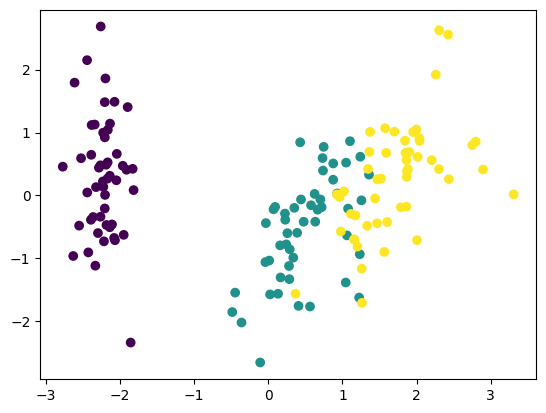

In [11]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)
plt.show()

Text(0, 0.5, 'Eucledian Distance')

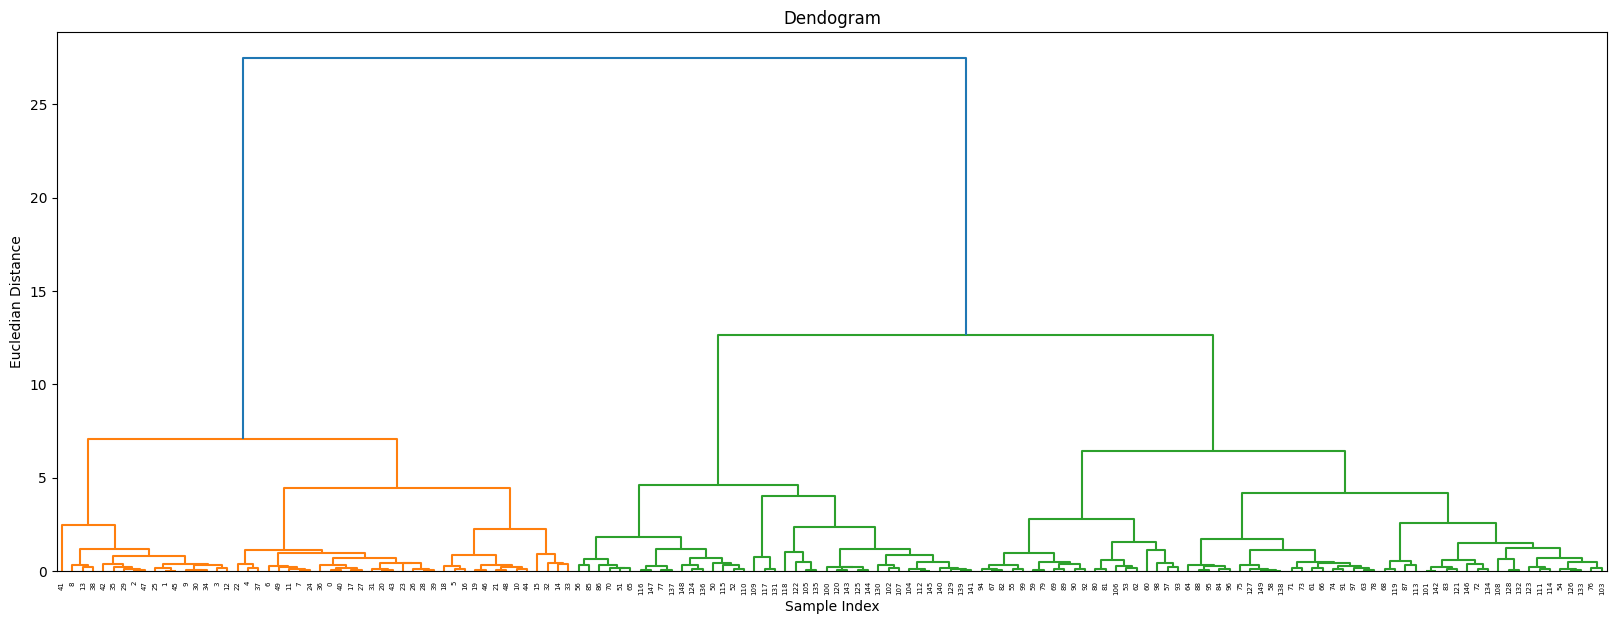

In [12]:
## applying agglomerative clustring
##construct a dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendogram")
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Using only 'linkage' parameter
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit(pca_scaled)

# To get the resulting cluster labels
labels = cluster.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


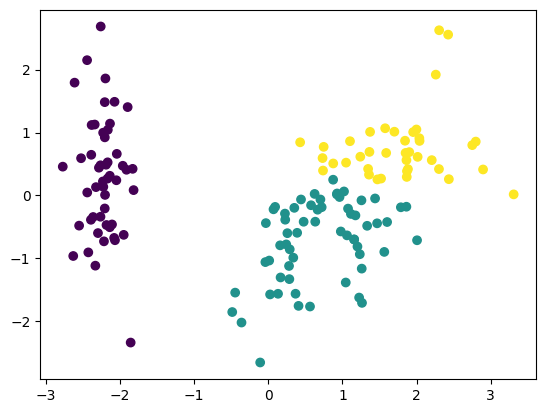

In [21]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)
plt.show()